In [3]:
import pandas as pd
import numpy as np
import csv

csv = pd.read_csv('./data/INGREDIENT_INFO.csv')

In [2]:
csv.head()

,ID,RECIPE_ID,RECIPE_TITLE,INGREDIENT,COUNT
0,1,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,오리고기,6
1,2,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장라면,4
2,3,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,기름,4
3,4,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,물,7
4,5,256,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장,1


In [103]:
ingredient_list = pd.read_csv('./data/ingredient_list_modify.csv', index_col=0)
ingredient_list.head()

,Category
Food,
돼지,돼지고기
돼지고기,돼지고기
돼지안심,돼지고기
돼지등심,돼지고기
돼지목살,돼지고기


In [104]:
result = []
recipe_id = csv['RECIPE_ID']
#title = csv['RECIPE_TITLE']
ingredient = csv['INGREDIENT']
#count = csv['COUNT']
csv['CATEGORY'] = 'NULL'

#food = ingredient_list['Food']
#category = ingredient_list['Category']

for i in range(len(recipe_id)):
    result.append(ingredient_list.loc[ingredient[i]]['Category'])
    if(i%100000 == 0):
        print(i,"번째 실행")

print(result[:10])

0 번째 실행
100000 번째 실행
200000 번째 실행
300000 번째 실행
400000 번째 실행
500000 번째 실행
600000 번째 실행
['오리고기', '면류', '유지류', '가공식품', '즉석식품', '채소', '소고기', '소스장류', '버섯', '조미료']


In [105]:
csv['CATEGORY'] = result
#csv.loc[30]['CATEGORY'] = '가공식품'
csv.loc[30]

ID                         31
RECIPE_ID                 259
RECIPE_TITLE    최애반찬 소시지 감자조림
INGREDIENT                  햄
COUNT                       2
CATEGORY                 가공식품
Name: 30, dtype: object

In [116]:
my_dict = {"RECIPE_ID": [], "RECIPE_TITLE": [], "돼지고기": [], "소고기": [], "닭고기": [], "오리고기": [], "양고기": [], "생선": [],
           "갑각류": [], "조개류": [], "해조류": [], "두족류": [], "과일": [], "견과류": [], "알류": [], "채소": [], "두부": [], "곡류": [],
           "묵류": [], "버섯": [], "나물": [], "가공식품": [], "유제품": [], "면류": [], "소스장류": [], "유지류": [], "조미료": [], 
           "육수": [], "가루": [], "즉석식품": [], "건조식품": [], "빵류": [], "주류": []}
input_data = pd.DataFrame(my_dict)

In [117]:
title = csv['RECIPE_TITLE']
count = csv['COUNT']
category = csv['CATEGORY']
prev_id = csv['RECIPE_ID'][0]

my_dict = {"RECIPE_ID": prev_id, "RECIPE_TITLE": title[0], "돼지고기": 0, "소고기": 0, "닭고기": 0, "오리고기": 0, "양고기": 0, "생선": 0,
           "갑각류": 0, "조개류": 0, "해조류": 0, "두족류": 0, "과일": 0, "견과류": 0, "알류": 0, "채소": 0, "두부": 0, "곡류": 0,
           "묵류": 0, "버섯": 0, "나물": 0, "가공식품": 0, "유제품": 0, "면류": 0, "소스장류": 0, "유지류": 0, "조미료": 0, 
           "육수": 0, "가루": 0, "즉석식품": 0, "건조식품": 0, "빵류": 0, "주류": 0}
for i in range(len(recipe_id)):
    if prev_id != recipe_id[i]:
        tmp_df = pd.DataFrame([my_dict.values()], columns=my_dict.keys())
        input_data = input_data.append(tmp_df)
        my_dict = {"RECIPE_ID": recipe_id[i], "RECIPE_TITLE": title[i], "돼지고기": 0, "소고기": 0, "닭고기": 0, "오리고기": 0, "양고기": 0, "생선": 0,
                   "갑각류": 0, "조개류": 0, "해조류": 0, "두족류": 0, "과일": 0, "견과류": 0, "알류": 0, "채소": 0, "두부": 0, "곡류": 0,
                   "묵류": 0, "버섯": 0, "나물": 0, "가공식품": 0, "유제품": 0, "면류": 0, "소스장류": 0, "유지류": 0, "조미료": 0, 
                   "육수": 0, "가루": 0, "즉석식품": 0, "건조식품": 0, "빵류": 0, "주류": 0}
        cate = str(category[i])
        my_dict[cate.strip()] += count[i]
    else:
        cate = str(category[i])
        #print(cate)
        my_dict[cate.strip()] += count[i]
    prev_id = recipe_id[i]
    if(i%100000 == 0):
        print(i,"번째 실행")
tmp_df = pd.DataFrame([my_dict.values()], columns=my_dict.keys())
input_data = input_data.append(tmp_df)
input_data.head()

0 번째 실행
100000 번째 실행
200000 번째 실행
300000 번째 실행
400000 번째 실행
500000 번째 실행
600000 번째 실행


,RECIPE_ID,RECIPE_TITLE,돼지고기,소고기,닭고기,오리고기,양고기,생선,갑각류,조개류,...,면류,소스장류,유지류,조미료,육수,가루,즉석식품,건조식품,빵류,주류
0,256.0,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,257.0,69레시피 불고기 소고기볶음반찬,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
0,258.0,풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
0,259.0,최애반찬 소시지 감자조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
0,260.0,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
csv.to_csv('INGREDIENT_INFO_modify.csv', index=False, encoding='utf-8')
input_data.to_csv('recipe_ingredient_frequency.csv', index=False, encoding='utf-8')

<bound method NDFrame.to_csv of     RECIPE_ID                       RECIPE_TITLE  돼지고기  소고기  닭고기  오리고기  양고기  \
0       256.0         밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식   0.0  0.0  0.0   6.0  0.0   
0       257.0                  69레시피 불고기 소고기볶음반찬   0.0  4.0  0.0   0.0  0.0   
0       258.0         풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬   0.0  0.0  0.0   0.0  0.0   
0       259.0                      최애반찬 소시지 감자조림   0.0  0.0  0.0   0.0  0.0   
0       260.0  버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기   0.0  0.0  0.0   0.0  0.0   
..        ...                                ...   ...  ...  ...   ...  ...   
0     57517.0                             쇠고기갈비찜   0.0  5.0  0.0   0.0  0.0   
0     57518.0                          보노콘스프 떡볶이   0.0  0.0  0.0   0.0  0.0   
0     57519.0                              마황도주스   0.0  0.0  0.0   0.0  0.0   
0     57520.0                  중기이유식 버섯소고기 브로콜리죽   0.0  4.0  0.0   0.0  0.0   
0     57521.0          고소하고 부드러운 나비파스타 파르팔레크림파스타   0.0  0.0  0.0   0.0  0.0   

     생선  갑각류  조개류  

In [4]:
data = pd.read_csv('data/recipe_ingredient_frequency.csv', index_col = 'RECIPE_TITLE')
data = data.drop(columns=['RECIPE_ID'])
data.head()

,돼지고기,소고기,닭고기,오리고기,양고기,생선,갑각류,조개류,해조류,두족류,...,면류,소스장류,유지류,조미료,육수,가루,즉석식품,건조식품,빵류,주류
RECIPE_TITLE,,,,,,,,,,,,,,,,,,,,,
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69레시피 불고기 소고기볶음반찬,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
최애반찬 소시지 감자조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.cluster import KMeans
clusters=40
kmeans = KMeans(init="k-means++", n_clusters=clusters, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=40, random_state=0)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(data)

pca_data = pd.DataFrame(pca.transform(data))

In [18]:
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((
    tuple(mcolors.rgb_to_hsv(
        mcolors.to_rgba(color)[:3])), name) for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).items())))[1]

skips = math.floor(len(colors[20:-20])/clusters)
cluster_colors = colors[20:-20:skips]

<IPython.core.display.Javascript object>


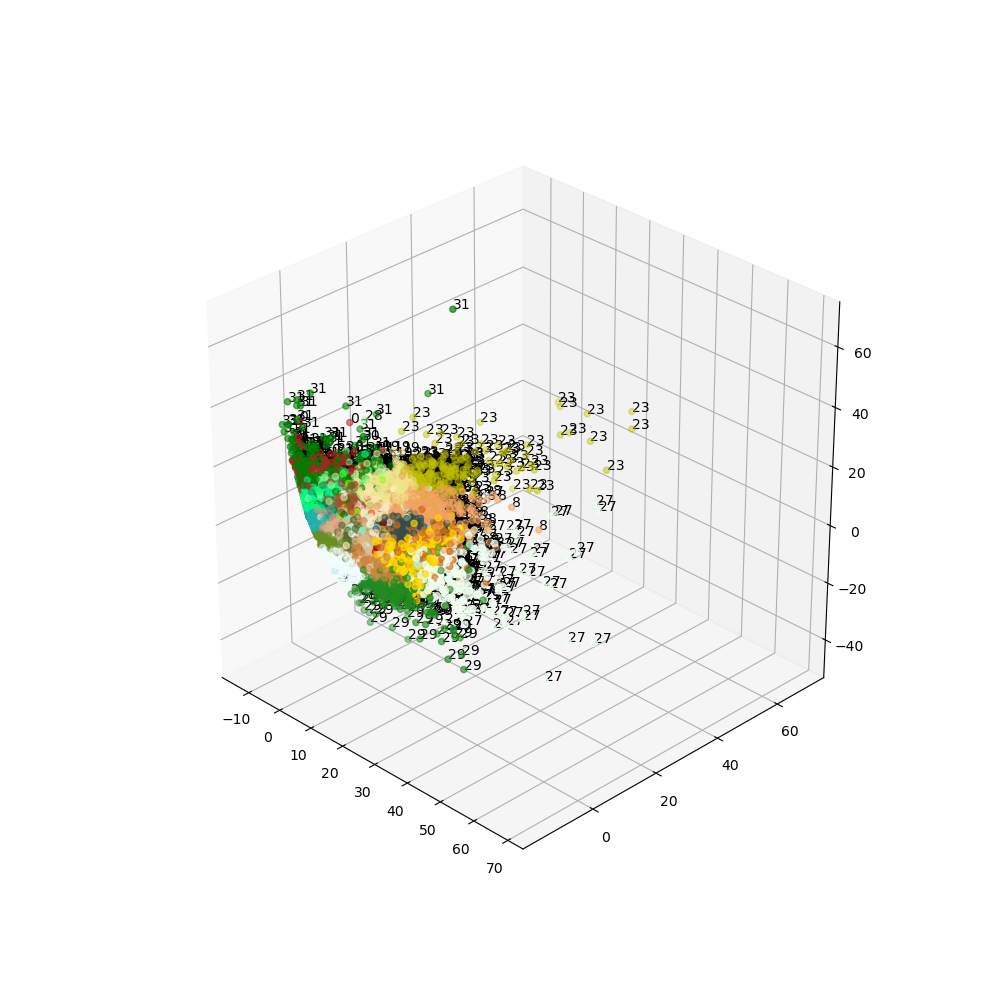

In [19]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
          c=list(map(lambda label: cluster_colors[label], kmeans.labels_)))

str_labels = list(map(lambda label: '% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s=str_label, zorder = 0, color='k'), pca_data[0], pca_data[1], pca_data[2], str_labels))

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()

In [163]:
recipeLabels = list(zip(data.index, kmeans.labels_))
print(recipeLabels[0])

('밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식', 6)


In [165]:
import csv

with open('./recipe_labels3.csv', encoding='utf-8', mode='w', newline='') as f:
    writer = csv.writer(f)
    for data in recipeLabels:
        writer.writerow(data)

In [168]:
for data in recipeLabels:
    if data[1] == 4:
        print(data)

('풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬', 3)
('새우요리 갈릭마요새우 요거 완전 맛있지', 3)
('칠리새우쉬림프 박스 만들기', 3)
('꿀마늘 닭강정아이들 단골메뉴 찜', 3)
('단짠단짠 치느님! 목우촌 치킨너겟 간장치킨 만들기', 3)
('신혼밥상 10분 반찬! 메추리알조림', 3)
('완전쉬운 양념치킨 소스만들기치킨너겟', 3)
('출출할때 필요한 꿀 떨어지는 허니윙 ', 3)
('10분반찬 두부참치전  담백하고 촉촉하니 하나씩 집어먹기 좋아요', 3)
('만물상에 소개된 불 없이 5분만에 만든 오징어채 황금 레시피!', 3)
('표고버섯달걀죽 - 아침식사로 좋으네 달걀죽', 3)
('돼지목살꼬치 아이간식과 남편 술안주로 딱이야', 3)
('영화속요리 10탄 줄리앤줄리아 속 크림소스 치킨스테이크', 3)
('나시고랭 숙주로 간단한 나시고랭 볶음밥', 3)
('버섯찌개 - 숙주버섯찌개 ', 3)
('새송이버섯요리', 3)
('다른 반찬이 필요없는 매운 어묵 비빔밥', 3)
('건강 가지를 스테이크로 즐겨요.', 3)
('삼겹살과 찰떡 궁합  파채 만들기', 3)
('sns 마요네즈 마늘빵, 에어프라이어 마늘빵 만들기, 트위터 마늘빵, 식빵요리', 3)
('매콤한 두부덮밥, 눈 깜짝할 새 완성되는 초간단 덮밥요리 ', 3)
('깔끔매콤 차돌박이 숙주찜', 3)
('버섯 들깨소스 무침', 3)
('청포묵 김무침, 초간단 반찬 ', 3)
('아삭한 봄동 겉절이 ', 3)
('아침국으로...두부김치계란탕', 3)
('칼국수집 진한 겉절이, 겉절이 황금레시피', 3)
('초간단 10분요리! 가지덮밥 맛있어요!', 3)
('맛있는 반찬 단호박 견과류 조림!', 3)
('간장 다진소고기볶음다대기', 3)
('닭다리살 스테이크 만드는 법, 술안주로도 좋고 밥 반찬으로도 좋은 닭다리살 요리', 3)
('차돌박이 참나물 샐러드 , 쉽고 간단하지만 폼나고 맛있다.', 3)
('초간단국민반찬 진미채 볶음 만들기', 3)
('초간단 밑반찬 봄동나물', 3)
(

('작고 간단해서 좋다! 도시락에 쏙 들어가는 새우주먹밥', 3)
('집에서 떡꼬치 만들기 ', 3)
('심야식당 오해와 진실의 또띠아 반달피자  또띠아 피자 만들기', 3)
('소박한 골뱅이무침 레시피', 3)
('코코넛오일로 만든 약식. 피클과 함께 드셔 보세요', 3)
('불고기전골', 3)
('면역력 높이는 단짠 반찬/단호박 견과류 꿀조림', 3)
('마리텔, 이혜정 요리연구가의 만능매운장 레시피 !', 3)
('꽃게무침', 3)
('바쁜아침 초간단 김국', 3)
('올리브쇼 이연복셰프 멘보샤만들기', 3)
('철판볶음밥, 철판데리야끼볶음밥 만드는법', 3)
('닭가슴살 부침개 닭가슴살캔으로 뚝딱 만들어내며 반찬없을때 만들어 먹으면 좋은 부침개....', 3)
('바삭하고 맛난 닭날개 구이', 3)
('밤밥오리고기훈제전근대된장국', 3)
('닭가슴살 토마토소스 조림 ', 3)
('닭볶음탕 황금레시피', 3)
('발사믹 소스 비프 스테이크', 3)
('백종원의 허니옥수수 - 집밥백선생2 25회 ', 3)
('백종원의 마약옥수수 - 집밥백선생2 25회 ', 3)
('백종원의 버섯버거 - 집밥백선생2 25회 ', 3)
('백종원의 집버거 - 집밥백선생2 25회 ', 3)
('짭짤하고 달달한 연근조림-', 3)
('빼빼로데이, 수능날 달콤함 선물 마카다미아 밀크카라멜 만들기  ', 3)
('반찬으로 변신한 안주용 문어 건문어조림', 3)
('씹고 뜯고 맛보는갈비버섯 샤브샤브', 3)
('추억의 그 맛이 궁금하다면! 술빵 ', 3)
('김선영의 고추장 전 볶음 - 살림 9단의 만물상 213회', 3)
('뜨끈한 만두국', 3)
('소고기 미역국 끊이기', 3)
('위염장염으로 고생하는 엄마랑 유아의 삼삼한 반찬 - 간고등어 구이', 3)
('초간단 돼지고기 파말이', 3)
('소고기미역국', 3)
('브로콜리 듬뿍 모닝빵 샌드위치 만들기', 3)
('마리텔 빅마마의 파소스레시피', 3)
('유자를 넣은 돼지 간장 불고기 드셔보셨어요?', 3)
('흑초의 풍미를 